In [2]:
pip install requests networkx pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm  # Импортируем tqdm для отслеживания прогресса

In [3]:
# Создание пустого графа
G = nx.Graph()

In [5]:
with open('social_graph.csv', 'r') as file:
    reader = csv.reader(file, quotechar='"')
    next(reader)

    total_lines = sum(1 for _ in file)
    file.seek(0)
    next(file)

    for row in tqdm(reader, total=total_lines, desc="Обработка строк"):
        user = int(row[0])
        friends = row[1].split(',')  # Разделение друзей по запятой

        # Условие для пропуска пользователей с более чем 100 друзьями
        if len(friends) > 100:
            continue

        G.add_edges_from((user, int(friend)) for friend in friends)  # Добавление рёбер для каждого друга


Обработка строк: 100%|██████████| 1629/1629 [00:00<00:00, 104356.32it/s]


In [7]:
# Расчет центральности по степени
degree_centrality = nx.degree_centrality(G)

In [9]:
# Определение цвета узлов
node_colors = [
    'green' if degree_centrality[node] > 0.01 else 'lightblue'  # Задаем пороговое значение для центральных точек
    for node in G.nodes
]

In [11]:
# Визуализация всего графа
plt.figure(figsize=(50, 50))
pos = nx.spring_layout(G, iterations=50)  # Расчет положения узлов для всего графа

<Figure size 5000x5000 with 0 Axes>

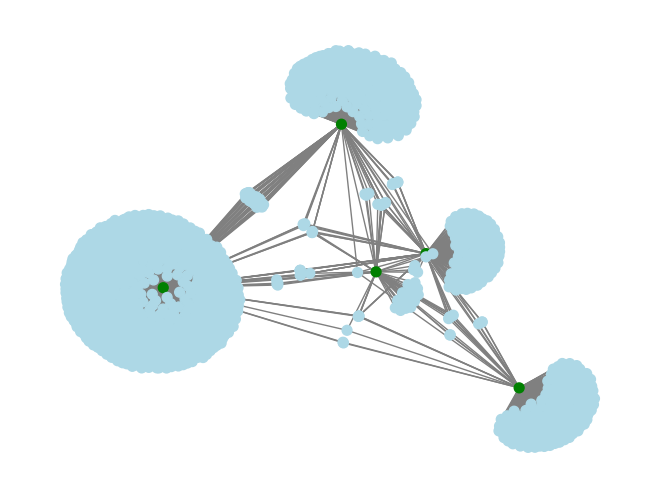

In [13]:
# Визуализация графа
nx.draw(
    G, pos,
    with_labels=False,
    node_size=50,
    node_color=node_colors,  # Используем список цветов для узлов
    font_size=8,
    font_color='black',
    edge_color='gray'
)